In [1]:
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 로이터 뉴스 데이터셋 불러오기
from keras.datasets import reuters
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,LSTM,Embedding
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 불러온 데이터를 학습셋, 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [4]:
# 데이터 확인하기
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [6]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

C:\Users\shha\Anaconda3\envs\keras\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 15s 2ms/step - loss: 2.5530 - accuracy: 0.3719 - val_loss: 2.0603 - val_accuracy: 0.4938
Epoch 2/20
8982/8982 [==============================] - 18s 2ms/step - loss: 1.9531 - accuracy: 0.4893 - val_loss: 1.8367 - val_accuracy: 0.5254
Epoch 3/20
8982/8982 [==============================] - 18s 2ms/step - loss: 1.8062 - accuracy: 0.5247 - val_loss: 1.8454 - val_accuracy: 0.5321
Epoch 4/20
8982/8982 [==============================] - 18s 2ms/step - loss: 1.7399 - accuracy: 0.5473 - val_loss: 1.7564 - val_accuracy: 0.5414
Epoch 5/20
8982/8982 [==============================] - 18s 2ms/step - loss: 1.6671 - accuracy: 0.5681 - val_loss: 1.6793 - val_accuracy: 0.5801
Epoch 6/20
8982/8982 [==============================] - 18s 2ms/step - loss: 1.6270 - accuracy: 0.5825 - val_loss: 1.6802 - val_accuracy: 0.5828
Epoch 7/20
8982/8982 [==============================] - 18s 2ms/step - loss: 1.516

In [7]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

2246/2246 [==============================] - 1s 621us/step

 Test Accuracy: 0.7191


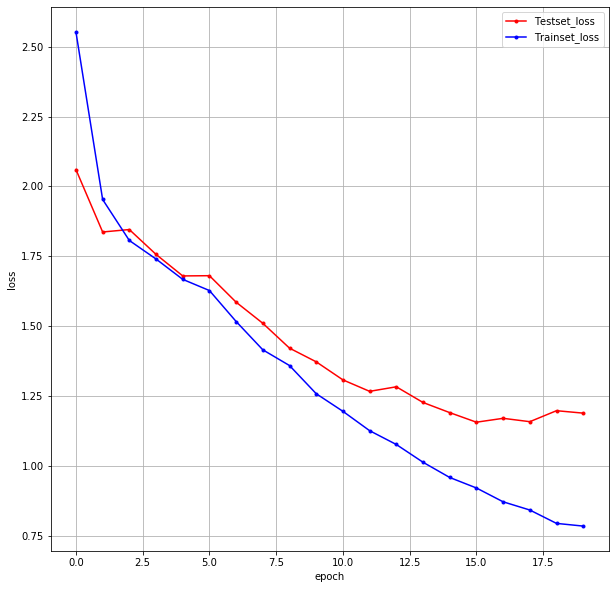

In [10]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.figure(figsize=(10,10))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()